In [1]:
import kagglehub
path = kagglehub.dataset_download("bhavikjikadara/mental-health-dataset")
print("path to dataset files: ", path)

path to dataset files:  /kaggle/input/mental-health-dataset


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(path + "/Mental Health Dataset.csv")

In [3]:
# Data Overview
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
# Check Data for Null Values and Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [5]:
# Shape of Data
data.shape

(292364, 17)

In [6]:
# Display Descriptive Analysis of the Dataset
data.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [7]:
# Check Number of Null Values in the DataFrame
data.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [8]:
# Fill Null with Most Common Values
data['self_employed'] = data['self_employed'].fillna(data['self_employed'].mode()[0])

In [9]:
# Check DataFrame for Duplicates
data.duplicated().sum()

np.int64(2313)

In [10]:
# Drop Duplicates
data.drop_duplicates(inplace=True)

In [11]:
# Drop Timestamp
data.drop('Timestamp', axis=1, inplace=True)

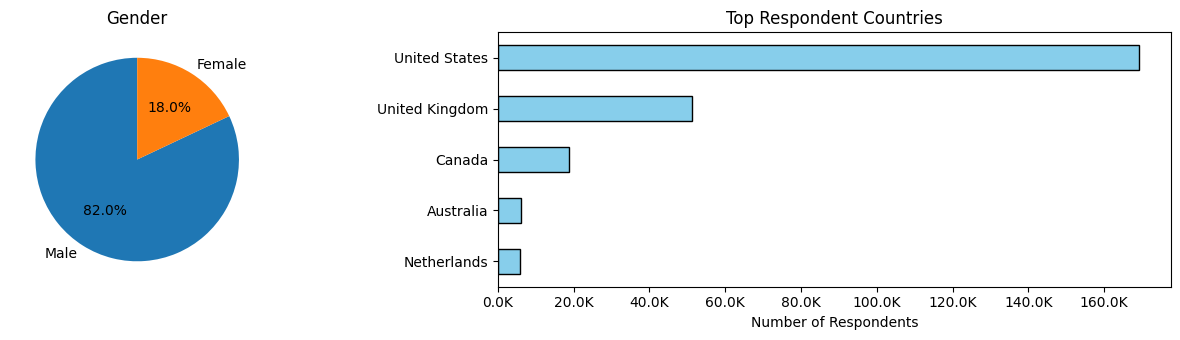

In [12]:
from matplotlib.ticker import FuncFormatter
fig, axes = plt.subplots(1, 2, figsize=(14, 3.5))

# Respondent Gender
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title('Gender')
axes[0].set_ylabel('')

# Top Respondent Countries
top_countries = data['Country'].value_counts().head()
top_countries.plot.barh(ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Top Respondent Countries')
axes[1].set_xlabel('Number of Respondents')
axes[1].set_ylabel('')
axes[1].invert_yaxis()

axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.1f}K'))

plt.tight_layout()
plt.show()

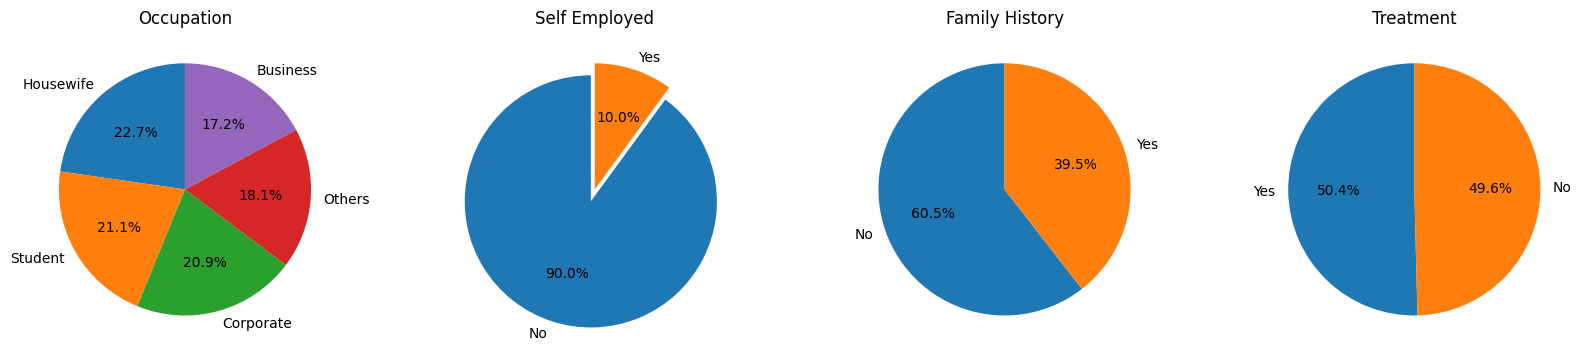

In [13]:
# Respondent Occupation, self_employed, family_history, and treatment Distribution
cols = [('Occupation', 'Occupation'), ('self_employed', 'Self Employed'), ('family_history', 'Family History'), ('treatment', 'Treatment')]

fig, axes = plt.subplots(1, 4, figsize=(16, 4.5))
for ax, (col, title) in zip(axes, cols):
    explode = (0.1, 0) if col == 'self_employed' else None
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, explode=explode)
    ax.set_title(title)
    ax.set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

In [14]:
# Days Indoors Rename Labels
data['Days_Indoors'] = data['Days_Indoors'].replace({
    'More than 2 months': '> 2 months',
    'Go out Every day': 'Every day'
})

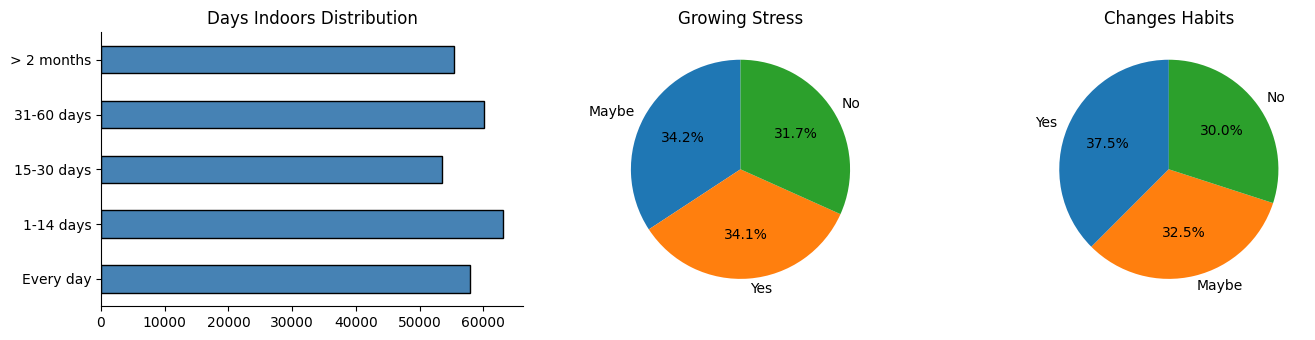

In [15]:
# Days Indoors order
order = ['Every day', '1-14 days', '15-30 days', '31-60 days', '> 2 months']
counts = data['Days_Indoors'].value_counts().reindex(order)

fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))

counts.plot.barh(ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set(title='Days Indoors Distribution', xlabel='', ylabel='')
axes[0].spines[['right', 'top']].set_visible(False)

pie_configs = [
    ('Growing_Stress', 'Growing Stress'),
    ('Changes_Habits', 'Changes Habits')]

for ax, (col, title) in zip(axes[1:], pie_configs):
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set(title=title, ylabel='')

plt.tight_layout()
plt.show()

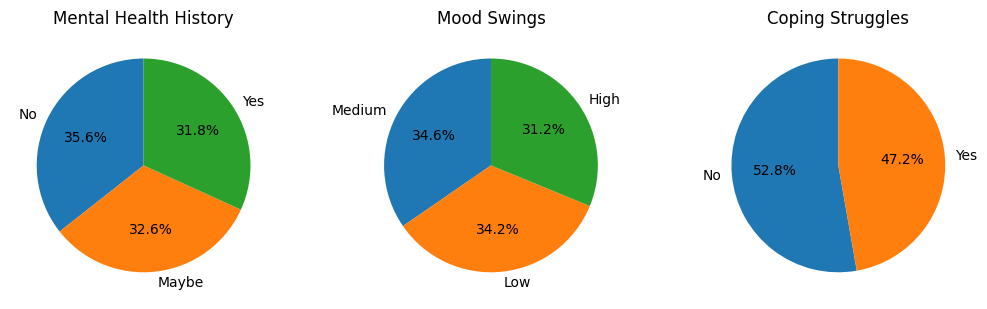

In [16]:
# Respondent Mental Health History, Mood Swings, and Coping Struggles
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
plots = [
    ('Mental_Health_History', 'Mental Health History'),
    ('Mood_Swings', 'Mood Swings'),
    ('Coping_Struggles', 'Coping Struggles')]

for ax, (col, title) in zip(axes, plots):
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

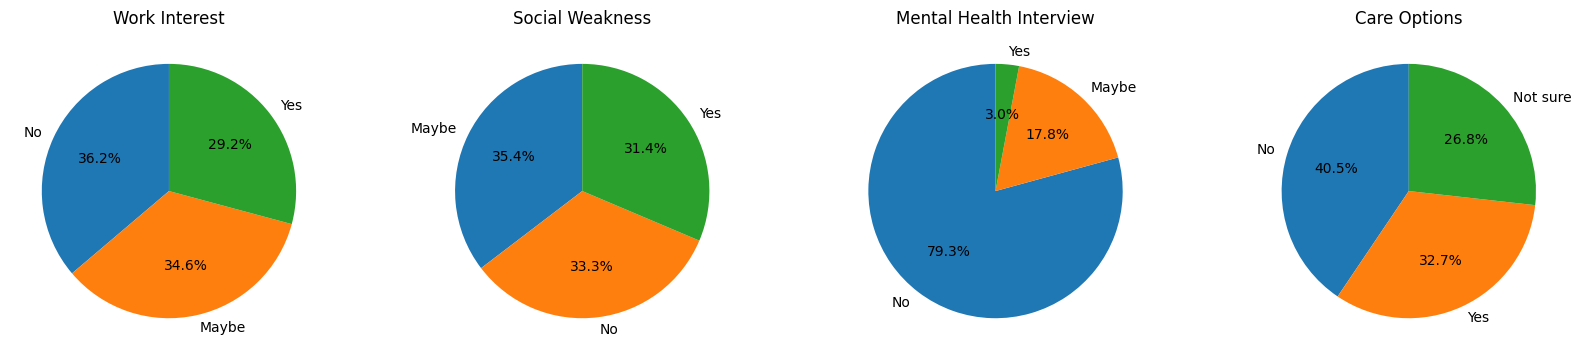

In [17]:
# Respondent Work Interest, Social Weakness, Mental Health Interview, and Care Options
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
plots = [
    ('Work_Interest', 'Work Interest'),
    ('Social_Weakness', 'Social Weakness'),
    ('mental_health_interview', 'Mental Health Interview'),
    ('care_options', 'Care Options')]

for ax, (col, title) in zip(axes, plots):
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

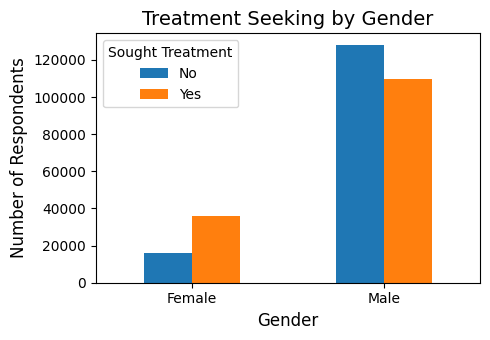

In [18]:
# Treatment Seeking by Gender
pd.crosstab(data['Gender'], data['treatment']).plot(kind='bar', stacked=False, figsize=(5, 3.5))
plt.title('Treatment Seeking by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sought Treatment', fontsize=10, title_fontsize=10)
plt.tight_layout()
plt.show()

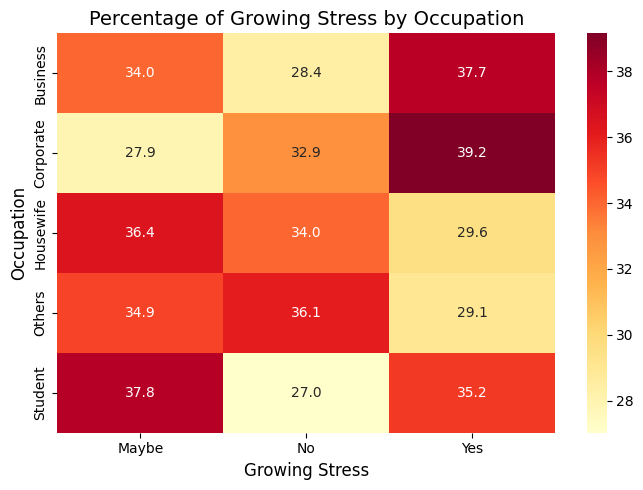

In [19]:
# Percentage of Growing Stress by Occupation
occupation_stress_pct = (pd.crosstab(data['Occupation'], data['Growing_Stress'])
    .pipe(lambda df: df.div(df.sum(axis=1), axis=0) * 100))

plt.figure(figsize=(7, 5))
sns.heatmap(occupation_stress_pct, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Percentage of Growing Stress by Occupation', fontsize=14)
plt.xlabel('Growing Stress', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.tight_layout()
plt.show()

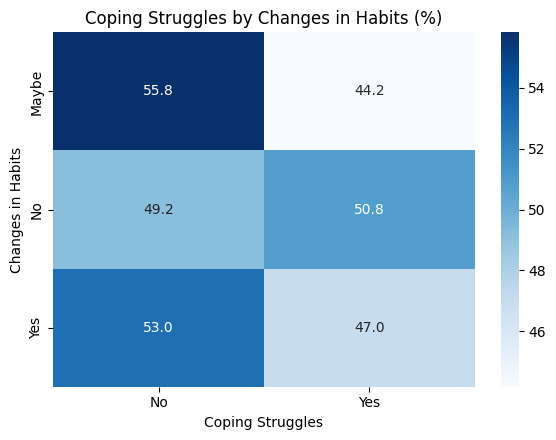

In [20]:
# Coping Struggles by Changes in Habits (%)
ct = pd.crosstab(data['Changes_Habits'], data['Coping_Struggles'])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6, 4.5))
sns.heatmap(ct_pct, annot=True, fmt='.1f', cmap='Blues')
plt.title('Coping Struggles by Changes in Habits (%)')
plt.xlabel('Coping Struggles')
plt.ylabel('Changes in Habits')
plt.tight_layout()
plt.show()

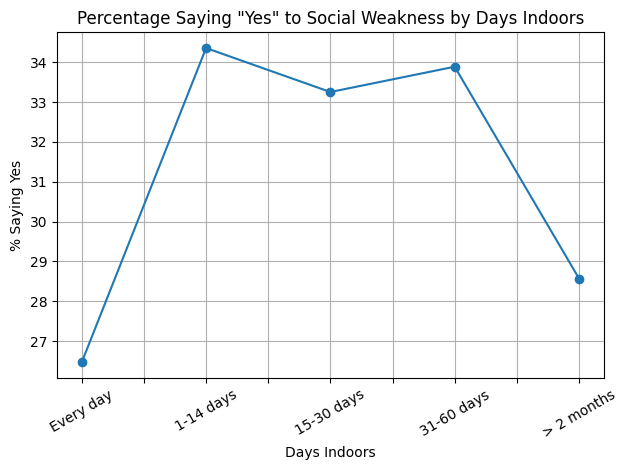

In [21]:
# Percentage Saying "Yes" to Social Weakness by Days Indoors
data['Days_Indoors'] = pd.Categorical(data['Days_Indoors'], categories=order, ordered=True)

result = (data.groupby('Days_Indoors')['Social_Weakness'].value_counts(normalize=True).unstack().fillna(0) * 100)
result['Yes'].plot(kind='line', marker='o')
plt.title('Percentage Saying "Yes" to Social Weakness by Days Indoors')
plt.xlabel('Days Indoors')
plt.ylabel('% Saying Yes')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

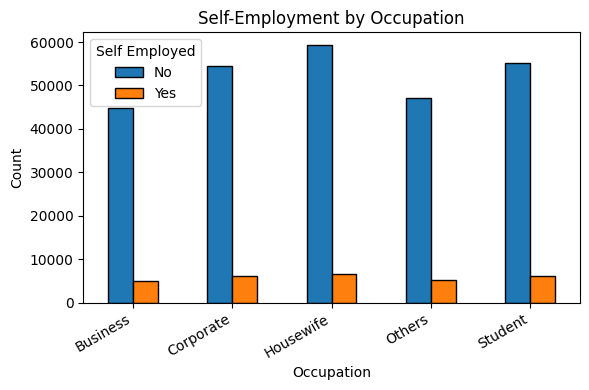

In [22]:
# Self Employment by Occupation
pd.crosstab(data['Occupation'], data['self_employed']).plot(kind='bar', figsize=(6, 4), edgecolor='black')
plt.title('Self-Employment by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Self Employed')
plt.tight_layout()
plt.show()

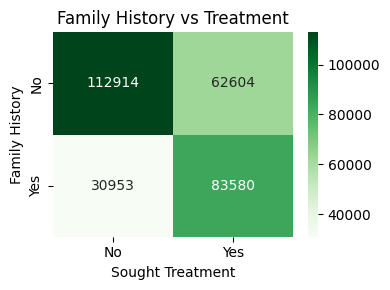

In [23]:
# Family History relation to seeking treatment
ct = pd.crosstab(data['family_history'], data['treatment'])
plt.figure(figsize=(4, 3))
sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('Family History vs Treatment')
plt.xlabel('Sought Treatment')
plt.ylabel('Family History')
plt.tight_layout()
plt.show()